In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [18]:
torch.manual_seed(1)

In [19]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b

            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

In [20]:
class linearRegression(nn.Module):
    def __init__(self, inputsize, outputsize):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(inputsize, outputsize)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [21]:
model = linearRegression(2, 2)

In [22]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [23]:
criterion = nn.MSELoss()

In [24]:
data = Data()

In [25]:
trainLoader = DataLoader(dataset=data, batch_size=5)

In [26]:
LOSS = []
epochs = 100
for epoch in range (epochs):
    for x,y in trainLoader:
        yhat = model(x)
        loss = criterion(yhat, y)
        LOSS.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

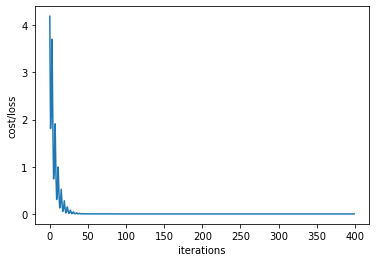

In [29]:
plt.plot(LOSS)
plt.xlabel('iterations')
plt.ylabel('cost/loss')
plt.show()